#### Dwi Pujining Tyas - PYTN-KS12-004
Python for Data Science

# VISUALIZATION DATA 
Publication-Grad Plot [Assignment Python 1]

## Prepping Data

In [339]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('dataset/london_crime_by_lsoa.csv')

In [4]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0.0,2016.0,11.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0.0,2016.0,11.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0.0,2015.0,5.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0.0,2016.0,3.0
4,E01004563,Wandsworth,Robbery,Personal Property,0.0,2008.0,6.0


In [5]:
df.shape

(2203730, 7)

Merename nama kolom agar lebih mudah dalam penggunaan ketika sedang mengolah data

In [6]:
df_baru = pd.read_csv('dataset/london_crime_by_lsoa.csv')

In [7]:
#mengganti nama kolom
df_baru.rename(columns = {'borough' : 'wilayah', 'major_category' : 'level_tinggi', 'minor_category' : 'level_rendah', 'value' : 'jumlah_kejahatan', 'year' : 'tahun', 'month' : 'bulan'}, inplace = True)

Mengecek apakah ada null pada data yang kita punya dan ketika ada maka clean data tersebut.

In [8]:
df_baru.isnull().sum()

lsoa_code           0
wilayah             0
level_tinggi        0
level_rendah        0
jumlah_kejahatan    1
tahun               1
bulan               1
dtype: int64

In [9]:
df_baru = df_baru.dropna()

In [10]:
df_baru.isnull().sum()

lsoa_code           0
wilayah             0
level_tinggi        0
level_rendah        0
jumlah_kejahatan    0
tahun               0
bulan               0
dtype: int64

In [11]:
df_baru.jumlah_kejahatan = df_baru.jumlah_kejahatan.astype(int)
df_baru.tahun = df_baru.tahun.astype(int)
df_baru.bulan = df_baru.bulan.astype(int)

In [12]:
df_baru

,lsoa_code,wilayah,level_tinggi,level_rendah,jumlah_kejahatan,tahun,bulan
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
2203724,E01001955,Hammersmith and Fulham,Criminal Damage,Other Criminal Damage,0,2012,11
2203725,E01002196,Harrow,Burglary,Burglary in a Dwelling,0,2013,10
2203726,E01002886,Kensington and Chelsea,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,5
2203727,E01002614,Hounslow,Drugs,Other Drugs,0,2016,5


In [13]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2203729 entries, 0 to 2203728
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   lsoa_code         object
 1   wilayah           object
 2   level_tinggi      object
 3   level_rendah      object
 4   jumlah_kejahatan  int64 
 5   tahun             int64 
 6   bulan             int64 
dtypes: int64(3), object(4)
memory usage: 134.5+ MB


Melihat korelasi data yang kita punya

In [14]:
def plot_corr(df, size=11):
    corr = df_baru.corr()
    fig, ax= plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

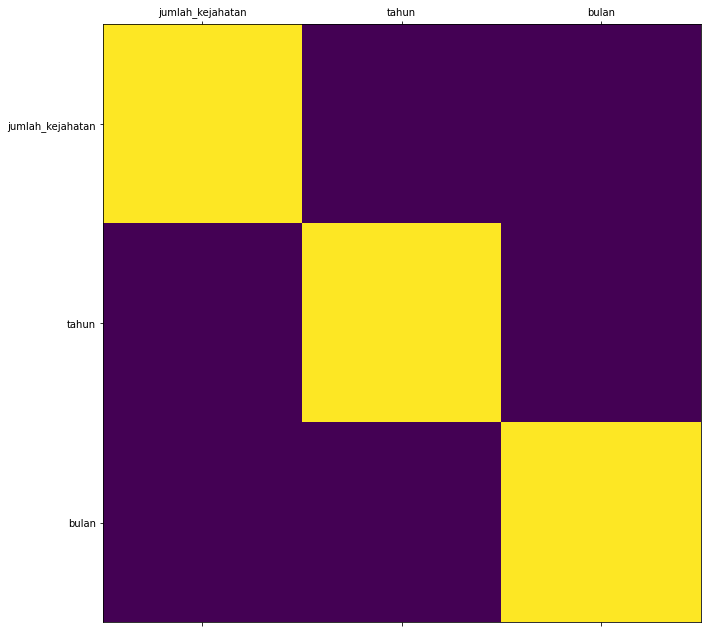

In [15]:
plot_corr(df_baru)

In [16]:
df_baru.corr()

,jumlah_kejahatan,tahun,bulan
jumlah_kejahatan,1.000000,-0.001447,0.001600
tahun,-0.001447,1.000000,-0.000542
bulan,0.001600,-0.000542,1.000000


## Visualisasi

### Line Pots

In [75]:
df_line = df_baru.groupby('wilayah')['jumlah_kejahatan'].sum()
df_line

wilayah
Barking and Dagenham      24424
Barnet                    34741
Bexley                    18565
Brent                     37500
Bromley                   29960
Camden                    45002
City of London              128
Croydon                   41991
Ealing                    40793
Enfield                   31728
Greenwich                 29542
Hackney                   35759
Hammersmith and Fulham    29838
Haringey                  35227
Harrow                    19239
Havering                  22884
Hillingdon                34312
Hounslow                  30567
Islington                 37310
Kensington and Chelsea    27557
Kingston upon Thames      14163
Lambeth                   47290
Lewisham                  34889
Merton                    18285
Newham                    42746
Redbridge                 29940
Richmond upon Thames      15418
Southwark                 45734
Sutton                    16356
Tower Hamlets             37542
Waltham Forest            33329


Dari data diatas kita dapat informasi setiap wilayah di LSOA dengan jumlah kejahatannya selama tahun 2008 sampai dengan 2016.

<AxesSubplot:xlabel='wilayah'>

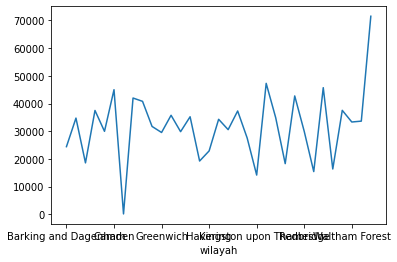

In [65]:
df_line.plot()

Text(0, 0.5, 'Jumlah Kejahatan')

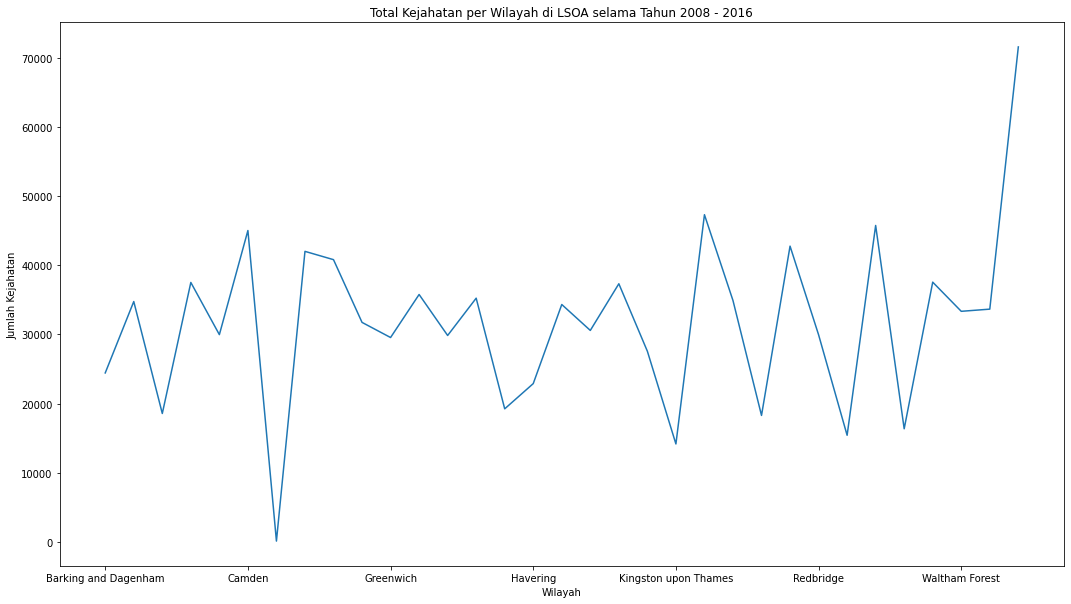

In [67]:
df_line.plot(kind='line',
             figsize=(18,10))
plt.title("Total Kejahatan per Wilayah di LSOA selama Tahun 2008 - 2016")
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Kejahatan')

Dapat dilihat pada visualisasi data di atas menunjukkan wilayah-wilayah di LSOA dengan jumlah kejahatannya selama tahun 2008 sampai dengan 2016

### Area Plot

In [76]:
df_area = df_baru.groupby('level_tinggi')['jumlah_kejahatan'].sum()
df_area

level_tinggi
Burglary                       123613
Criminal Damage                102710
Drugs                           76284
Fraud or Forgery                  912
Other Notifiable Offences       17147
Robbery                         42602
Sexual Offences                   179
Theft and Handling             429892
Violence Against the Person    254596
Name: jumlah_kejahatan, dtype: int64

Text(0, 0.5, 'Total Kejahatan')

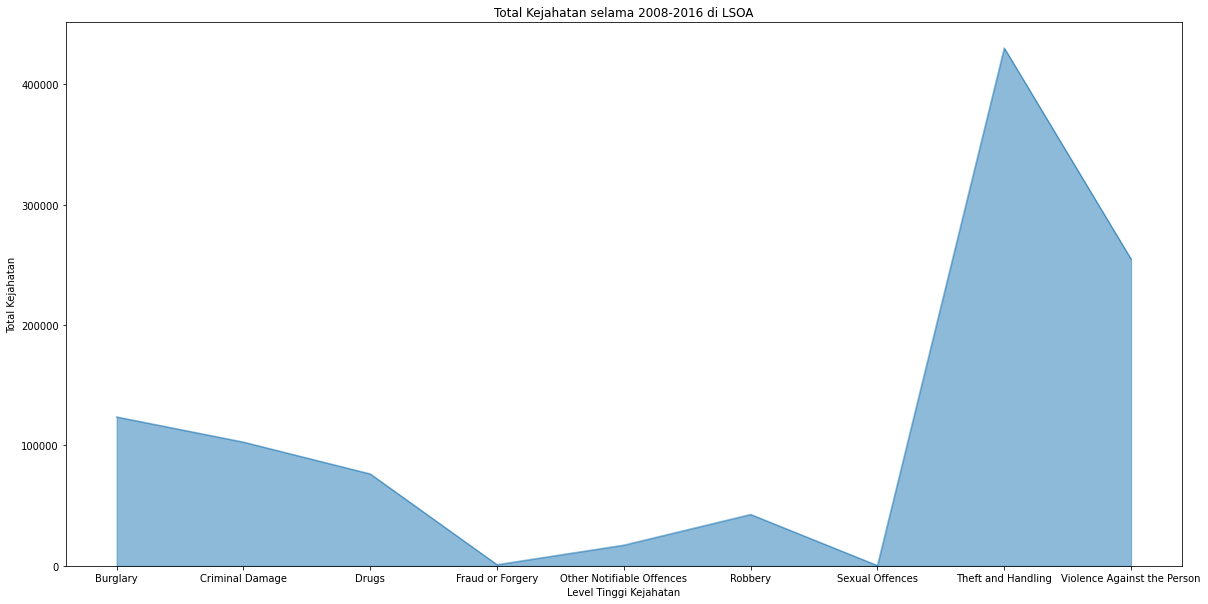

In [26]:
df_area.plot(kind='area', 
           alpha=0.50,
           stacked=False,
           figsize=(20,10))

plt.title('Total Kejahatan selama 2008-2016 di LSOA')
plt.xlabel('Level Tinggi Kejahatan')
plt.ylabel('Total Kejahatan')


Area Plot Analysis : Dari Visualisasi data diatas, dapat memberikan informasi bahwa kejahatan terbanyak dengan kategori level tinggi di LSOA selama tahun 2008 sampai dengan 2016 adalah Theft and Handling. Dapat dilihat jenis kejahatan tersebut adalah jenis kejahatan yang paling mendominasi kejahatan yang lainnya di LSOA.

### Histogram

In [77]:
df_histo = df_baru.groupby('tahun')['jumlah_kejahatan'].sum()
df_histo

tahun
2008    119922
2009    116250
2010    116333
2011    117025
2012    120450
2013    111802
2014    110432
2015    115712
2016    120009
Name: jumlah_kejahatan, dtype: int64

Text(0.5, 0, 'Jumlah Kejahatan')

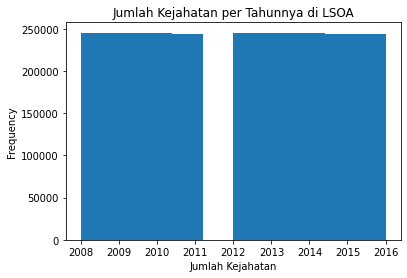

In [71]:
df_histo = df_baru['tahun'].plot(kind='hist')

df_histo.set_title("Jumlah Kejahatan per Tahunnya di LSOA")
df_histo.set_xlabel("Jumlah Kejahatan")

Dari visualisasi data histogram di atas, dapat diketahui bahwa kejahatan setiap tahunnya di LSOA tidak berbeda jauh. Naik turun kasus kejahatan masih diangka 100.000 an. 

### Bar Chart

In [26]:
df_bar = df_baru.groupby('wilayah')['jumlah_kejahatan'].sum()
df_bar

wilayah
Barking and Dagenham      24424
Barnet                    34741
Bexley                    18565
Brent                     37500
Bromley                   29960
Camden                    45002
City of London              128
Croydon                   41991
Ealing                    40793
Enfield                   31728
Greenwich                 29542
Hackney                   35759
Hammersmith and Fulham    29838
Haringey                  35227
Harrow                    19239
Havering                  22884
Hillingdon                34312
Hounslow                  30567
Islington                 37310
Kensington and Chelsea    27557
Kingston upon Thames      14163
Lambeth                   47290
Lewisham                  34889
Merton                    18285
Newham                    42746
Redbridge                 29940
Richmond upon Thames      15418
Southwark                 45734
Sutton                    16356
Tower Hamlets             37542
Waltham Forest            33329


Text(0.5, 0, 'Jumlah Kejahatan')

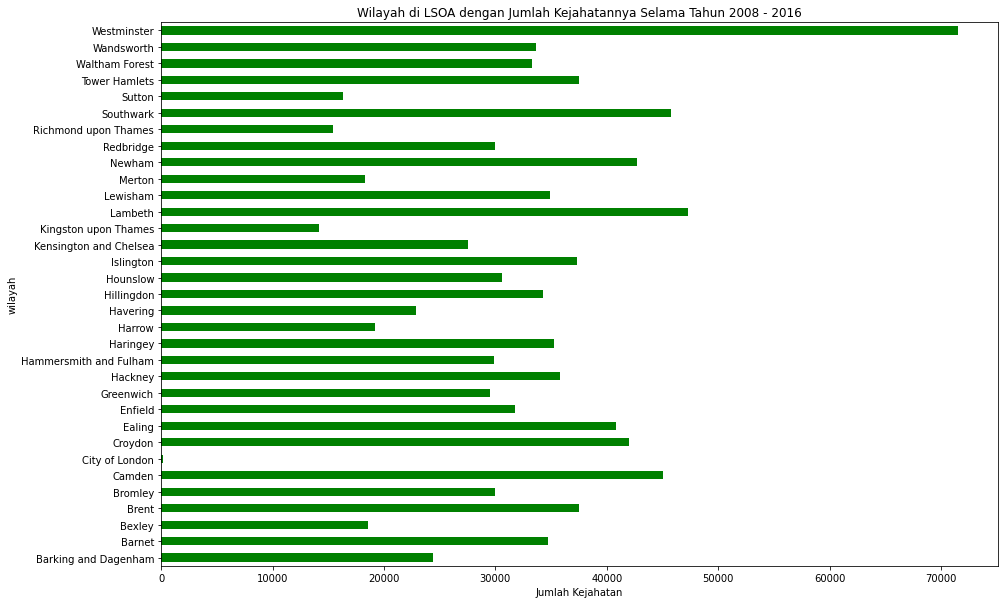

In [30]:
df_bar.plot(kind='barh'
            ,figsize=(15,10)
            ,color='green')

plt.title('Wilayah di LSOA dengan Jumlah Kejahatannya Selama Tahun 2008 - 2016')
plt.xlabel('Jumlah Kejahatan')

Dari visualisasi data menggunakan bar chart diatas sangat terlihat bahwa wilayah Westminster merupakan wilayah dengan kejahatan terbanyak di LSOA sepanjang tahun 2008 sampai dengan 2016 dan City of London merupakah wilayah paling sedikit kejahatannya.

### Pie Chart

In [161]:
df_pie = df_baru.groupby('level_rendah')['jumlah_kejahatan'].sum()
df_pie

level_rendah
Assault with Injury                        72949
Burglary in Other Buildings                43044
Burglary in a Dwelling                     80569
Business Property                           3482
Common Assault                             67782
Counted per Victim                           685
Criminal Damage To Dwelling                25262
Criminal Damage To Motor Vehicle           43179
Criminal Damage To Other Building          10752
Drug Trafficking                            5765
Going Equipped                               903
Handling Stolen Goods                       2657
Harassment                                 75077
Motor Vehicle Interference & Tampering      9204
Murder                                       161
Offensive Weapon                            6125
Other Criminal Damage                      23517
Other Drugs                                  517
Other Fraud & Forgery                        227
Other Notifiable                           16244
Other S

In [165]:
df_pie.nlargest(5)

level_rendah
Other Theft                 157238
Theft From Motor Vehicle     92619
Burglary in a Dwelling       80569
Harassment                   75077
Assault with Injury          72949
Name: jumlah_kejahatan, dtype: int64

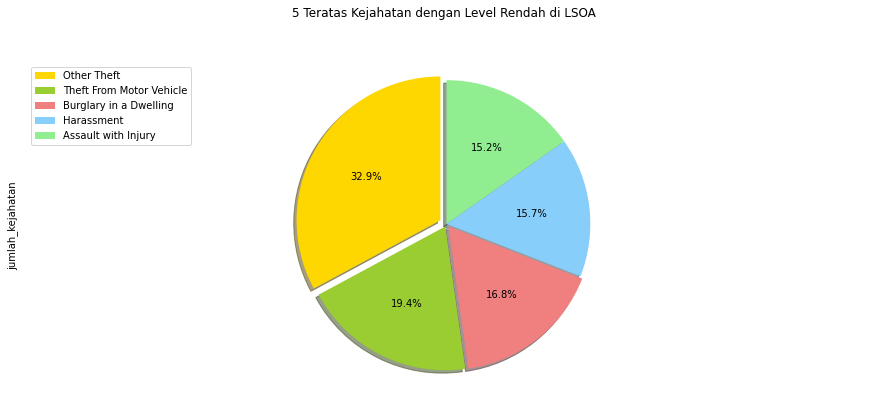

In [209]:
color_list = ["gold", "yellowgreen", "lightcoral", "lightskyblue", "lightgreen"]
explode_list = [0.05, 0.02, 0.02, 0, 0]

df_pie.nlargest(5).plot(
    kind='pie'
    ,figsize=(15,6)
    ,autopct='%1.1f%%'
    ,startangle=90
    ,shadow=True
    ,labels=None
    ,explode=explode_list
    ,colors=color_list
)

plt.title("5 Teratas Kejahatan dengan Level Rendah di LSOA", y=1.12)
plt.axis('equal')
plt.legend(labels=df_pie.nlargest(5).index, loc='upper left')


Dalam pie chart diatas dapat terlihat bahwa Other Theft merupakan kejahatan terbanyak dengan kategori kejahatan level rendah di wilayah LSOA selama tahun 2008 - 2016

### Box Plot

In [376]:
df_box = df_baru.groupby('wilayah')['jumlah_kejahatan'].sum()
df_box

wilayah
Barking and Dagenham      24424
Barnet                    34741
Bexley                    18565
Brent                     37500
Bromley                   29960
Camden                    45002
City of London              128
Croydon                   41991
Ealing                    40793
Enfield                   31728
Greenwich                 29542
Hackney                   35759
Hammersmith and Fulham    29838
Haringey                  35227
Harrow                    19239
Havering                  22884
Hillingdon                34312
Hounslow                  30567
Islington                 37310
Kensington and Chelsea    27557
Kingston upon Thames      14163
Lambeth                   47290
Lewisham                  34889
Merton                    18285
Newham                    42746
Redbridge                 29940
Richmond upon Thames      15418
Southwark                 45734
Sutton                    16356
Tower Hamlets             37542
Waltham Forest            33329


In [377]:
df_box.nlargest(3)

wilayah
Westminster    71533
Lambeth        47290
Southwark      45734
Name: jumlah_kejahatan, dtype: int64

In [301]:
df_box = pd.DataFrame(df_baru.groupby('wilayah')['jumlah_kejahatan'].sum())

In [306]:
df_box

,jumlah_kejahatan
wilayah,
Barking and Dagenham,24424
Barnet,34741
Bexley,18565
Brent,37500
Bromley,29960
Camden,45002
City of London,128
Croydon,41991
Ealing,40793


<AxesSubplot:>

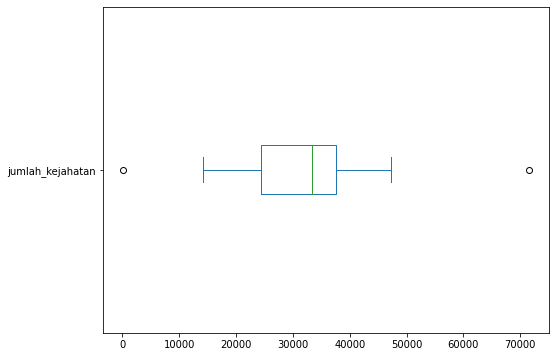

In [324]:
df_box.plot(kind='box', figsize=(8,6), vert=False)

In [251]:
df_box = df_baru.set_index('wilayah')

### Scatter Plot

In [253]:
tahun = range(2008, 2017)

In [382]:
df_scatter = df_baru.groupby('tahun')['jumlah_kejahatan'].sum()
df_scatter

tahun
2008    119922
2009    116250
2010    116333
2011    117025
2012    120450
2013    111802
2014    110432
2015    115712
2016    120009
Name: jumlah_kejahatan, dtype: int64

Kita dapat melihat terlebih dahulu jumlah kejahatan per tahunnya di LSOA dengan mengakses langsung data pada dataset dengan pandas. 

In [383]:
df_scatter.nlargest(1)

tahun
2012    120450
Name: jumlah_kejahatan, dtype: int64

In [259]:
df_scatter = pd.DataFrame(df_baru.groupby('tahun')['jumlah_kejahatan'].sum())

Namun karena pada scatter plot hanya bisa menggunakan data yang ada dalam dataframe, maka kita perlu membuat dataframe terlebih dahulu agar data dapat diolah dengan semestinya, sehingga menghasilkan visualisasi yang kita inginkan.

In [260]:
df_scatter.index

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name='tahun')

In [262]:
df_scatter.reset_index(inplace=True)

In [263]:
df_scatter.index

RangeIndex(start=0, stop=9, step=1)

In [264]:
df_scatter.columns = ["tahun", "jumlah_kejahatan"]

In [265]:
df_scatter

,tahun,jumlah_kejahatan
0,2008,119922
1,2009,116250
2,2010,116333
3,2011,117025
4,2012,120450
5,2013,111802
6,2014,110432
7,2015,115712
8,2016,120009


In [374]:
df_scatter.sum()

tahun                 18108
jumlah_kejahatan    1047935
dtype: int64

Maka dapat terlihat dengan baik data jumlah kejahatan per tahunnya yang disajikan dalam bentuk dataframe.

Text(0, 0.5, 'Jumlah Kejahatan')

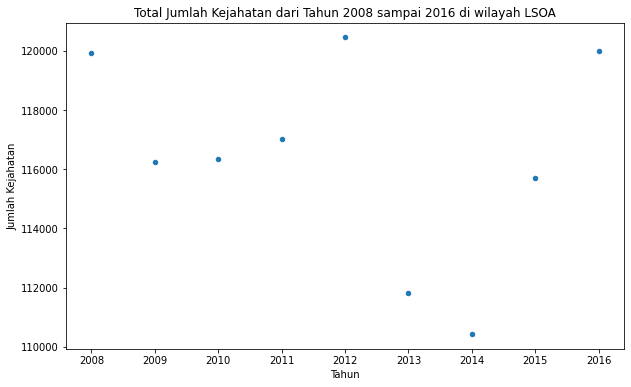

In [268]:
df_scatter.plot(
    kind='scatter'
    ,x='tahun'
    ,y='jumlah_kejahatan'
    ,figsize=(10,6)
)

plt.title("Total Jumlah Kejahatan dari Tahun 2008 sampai 2016 di wilayah LSOA")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kejahatan")


Dapat terlihat bahwa kejahatan yang terjadi di LSOA sepanjang tahun 2008 sampai dengan 2016 tidak menentu, terus mengalami naik turun tingkat ketinggian kejahatannya.

### Word Clouds

In [356]:
df_word = df_baru.groupby('level_tinggi')['jumlah_kejahatan'].sum()
df_word

level_tinggi
Burglary                       123613
Criminal Damage                102710
Drugs                           76284
Fraud or Forgery                  912
Other Notifiable Offences       17147
Robbery                         42602
Sexual Offences                   179
Theft and Handling             429892
Violence Against the Person    254596
Name: jumlah_kejahatan, dtype: int64

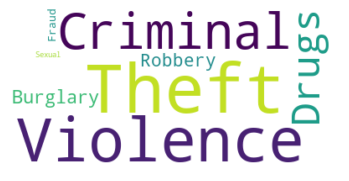

In [363]:
df_word = " ".join(level_tinggi.split()[0] for level_tinggi in df_baru.level_tinggi)

wordcloud = WordCloud(collocations = False, background_color = 'white').generate(df_word)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Dengan visualisasi word cloud tersebut dapat terlihat bahwa kasus yang mendominasi kejahatan yang terjadi di LSOA adalah kejahatan Violence, Criminal, Theft dan Drugs pada kategori kejahatan dengan level tinggi.

In [365]:
df_word = df_baru.groupby('level_rendah')['jumlah_kejahatan'].sum()
df_word

level_rendah
Assault with Injury                        72949
Burglary in Other Buildings                43044
Burglary in a Dwelling                     80569
Business Property                           3482
Common Assault                             67782
Counted per Victim                           685
Criminal Damage To Dwelling                25262
Criminal Damage To Motor Vehicle           43179
Criminal Damage To Other Building          10752
Drug Trafficking                            5765
Going Equipped                               903
Handling Stolen Goods                       2657
Harassment                                 75077
Motor Vehicle Interference & Tampering      9204
Murder                                       161
Offensive Weapon                            6125
Other Criminal Damage                      23517
Other Drugs                                  517
Other Fraud & Forgery                        227
Other Notifiable                           16244
Other S

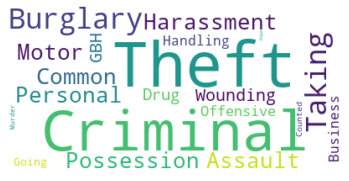

In [364]:
df_word = " ".join(level_rendah.split()[0] for level_rendah in df_baru.level_rendah)

wordcloud = WordCloud(collocations = False, background_color = 'white').generate(df_word)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Dan untuk kasus kejahatan yang mendominasi pada kategori kasus kejahatan rendah di LSOA adalah Theft, Criminal, Burglary dan Taking.

### Follium Maps

In [367]:
import folium

In [368]:
world_map = folium.Map()
world_map

In [366]:
df_baru.head()

,lsoa_code,wilayah,level_tinggi,level_rendah,jumlah_kejahatan,tahun,bulan
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


## Overall Analysis 

Dari dataset yang kita punya, data tersebut merupakan rekapan data kejahatan yang terjadi di wilayah-wilayah LSOA selama tahun 2008 sampai dengan 2016. Dengan keseluruhan visualisasi data yang sudah dilakukan, menunjukkan bahwa kejahatan yang mendominasi pada kategori level tinggi adalah Theft and Handling. Pada kategori level rendah kejahatan yang mendominasi adalah kejahatan Other Theft. Wilayah dengan kejahatan terbanyak adalah Westminster. Kejahatan terbanyak sepanjang tahun 2008 - 2016 adalah kejahatan pada tahun 2012 yang mencapai 120.450 kejahatan. Adapun seluruh kejahatan yang pernah terjadi adalah sebanyak 1.047.935 kejahatan.